In [1]:
import scanpy as sc
import pandas as pd
import numpy as np

In [2]:
data_dir = "/data200T/SPACseq/HD/output/subq/outs/binned_outputs/square_008um/"
gdata = sc.read_h5ad(data_dir + 'guide_combined.h5ad')

In [3]:
from scipy.stats import entropy
bin_entropies = np.apply_along_axis(entropy, 1, gdata.X.toarray())
print(bin_entropies)

[       nan 0.                nan ... 0.                nan 0.69314718]


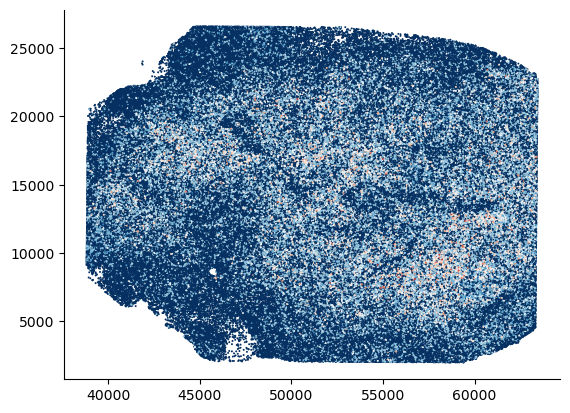

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.scatterplot(x=gdata.obsm['spatial'][:, 0], y=gdata.obsm['spatial'][:, 1],
                c=bin_entropies, s=2, edgecolor='none', cmap='RdBu_r')
sns.despine()

In [14]:
count_df = pd.DataFrame({
    'gene': gdata.var_names,
    'count': gdata.X.toarray().sum(axis=0).flatten()
}).sort_values(by='count', ascending=False)
count_df.head(3)['gene']

132     sgBcam
569      sgEhf
69     sgCks1b
Name: gene, dtype: object

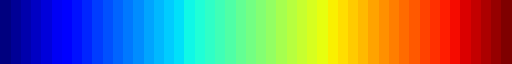

In [10]:
from matplotlib.colors import LinearSegmentedColormap
colors = plt.cm.jet(np.linspace(0, 1, 50))
new_cmap = LinearSegmentedColormap.from_list('custom_diverging', colors, N=50)
new_cmap

100%|██████████| 1/1 [00:00<00:00,  3.37it/s]


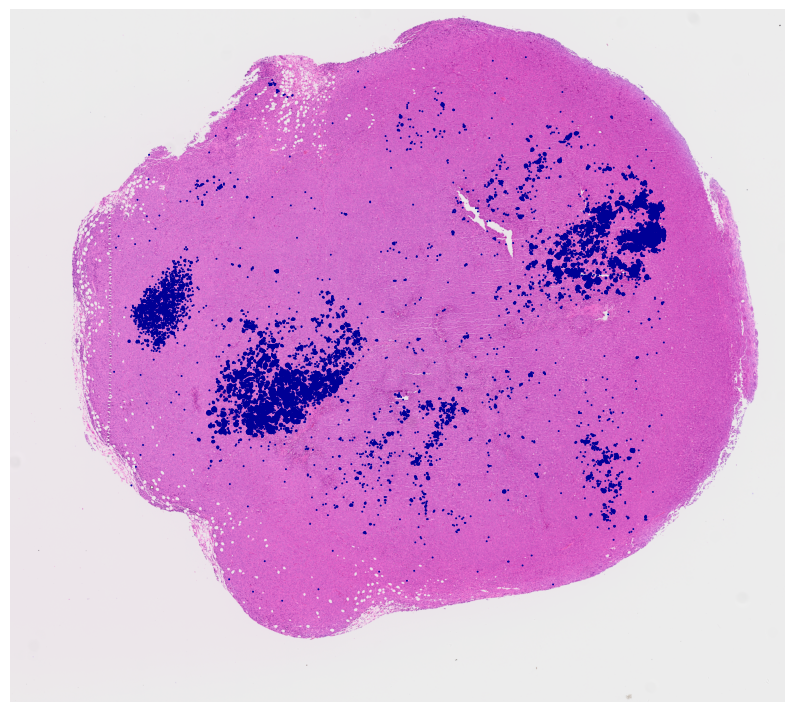

In [26]:
from PIL import Image
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

data_dir_8um = "/data200T/SPACseq/HD/output/subq/outs/binned_outputs/square_008um/"
gdata_8um = sc.read_h5ad(data_dir_8um + 'guide_combined.h5ad')

mask = gdata_8um.X.toarray().sum(axis=1) > 0
plot_data = gdata_8um[mask, :].copy()

# _, ax = plt.subplots(figsize=(10, 10))

scale_factors = {
    '994': 0.13396744,
    '992_1': 0.15574707,
    '992_2': 0.122028105,
    'subq': 0.08734006
}

count_df = pd.DataFrame({
    'gene': gdata_8um.var_names,
    'count': gdata_8um.X.toarray().sum(axis=0).flatten()
}).sort_values(by='count', ascending=False)

_, ax = plt.subplots(figsize=(10, 10))
image = Image.open('/data200T/SPACseq/HD/output/subq/outs/binned_outputs/square_008um/spatial/tissue_hires_image.png')
image_cropped = image.crop((image.size[0] // 2, 0, image.size[0], image.size[1]))  # 裁剪图像，只保留右半部分
plt.imshow(image_cropped)

colors = plt.cm.jet(np.linspace(0, 1, 50))

for i, gene in enumerate(tqdm(['sgEhf'])):
    sns.scatterplot(x=plot_data.obsm['spatial'][:, 0] * scale_factors['subq'] - image.size[0] // 2,
                    y=plot_data.obsm['spatial'][:, 1] * scale_factors['subq'],
                    s=plot_data[:, gene].X.toarray().flatten() * 2, color=colors[1])

# legend = ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False, ncol=2)
plt.savefig('./plots/perturbation_sgEhf.png', dpi=600, format='png')
sns.despine(left=True, bottom=True)
plt.xticks([])
plt.yticks([])
plt.show()

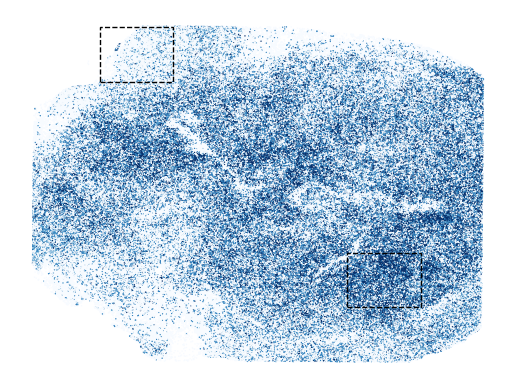

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
ax = sns.scatterplot(x=gdata.obsm['spatial'][:, 0], y=gdata.obsm['spatial'][:, 1],
                c=bin_entropies, s=1, edgecolor='none', cmap='Blues', vmax=1)
sns.despine(left=True, bottom=True)
plt.xticks([])
plt.yticks([])

import matplotlib.patches as patches
rect = patches.Rectangle((56000, 6000), 4000, 4000, linewidth=1, edgecolor='black', facecolor='none', linestyle='--')
ax.add_patch(rect)
rect = patches.Rectangle((42500, 22500), 4000, 4000, linewidth=1, edgecolor='black', facecolor='none', linestyle='--')
ax.add_patch(rect)
sns.despine(left=True, bottom=True)

plt.savefig('./plots/perturbation_shannon.png', dpi=600, format='png')
plt.show()

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.scatterplot(x=gdata.obsm['spatial'][:, 0], y=gdata.obsm['spatial'][:, 1],
                c=bin_entropies, s=2, edgecolor='none', cmap='RdBu_r')
sns.despine()

NameError: name 'bin_entropies' is not defined

<Figure size 640x480 with 0 Axes>

View of AnnData object with n_obs × n_vars = 18666 × 736
    obs: 'in_tissue', 'array_row', 'array_col'
    obsm: 'spatial'


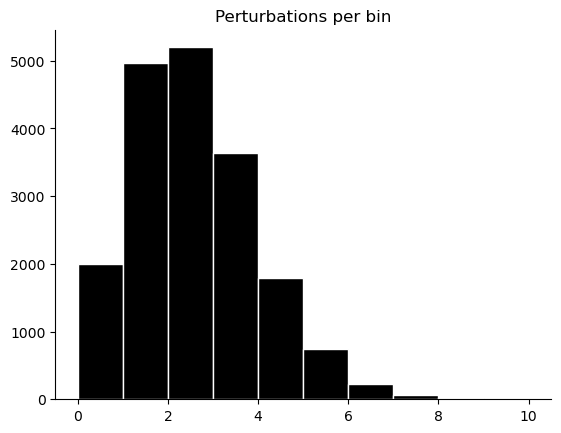

In [6]:
region_x, region_y = [56000, 60000], [6000, 10000]

plot_data = gdata[(gdata.obsm['spatial'][:, 0] < region_x[1]) & (gdata.obsm['spatial'][:, 0] > region_x[0]) &\
                  (gdata.obsm['spatial'][:, 1] < region_y[1]) & (gdata.obsm['spatial'][:, 1] > region_y[0])]

print(plot_data)
pd.DataFrame((plot_data.X.toarray() > 0).sum(axis=1)).hist(grid=False, color='black', edgecolor='white')
plt.title('Perturbations per bin')
sns.despine()

In [20]:
count_df['rank'] = count_df['count'].rank(method='min', ascending=False).astype(int)
count_df

,gene,count,rank
132,sgBcam,66449.0,1
569,sgEhf,21219.0,2
69,sgCks1b,19026.0,3
708,sgTff3,18465.0,4
36,sgRab8a,17595.0,5
...,...,...,...
286,sgTmem161a,0.0,732
610,sgIgf1r,0.0,732
656,sgIl2rg,0.0,732
372,sgSlco4a1,0.0,732


/tmp/ipykernel_3753/1599907545.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('bone')


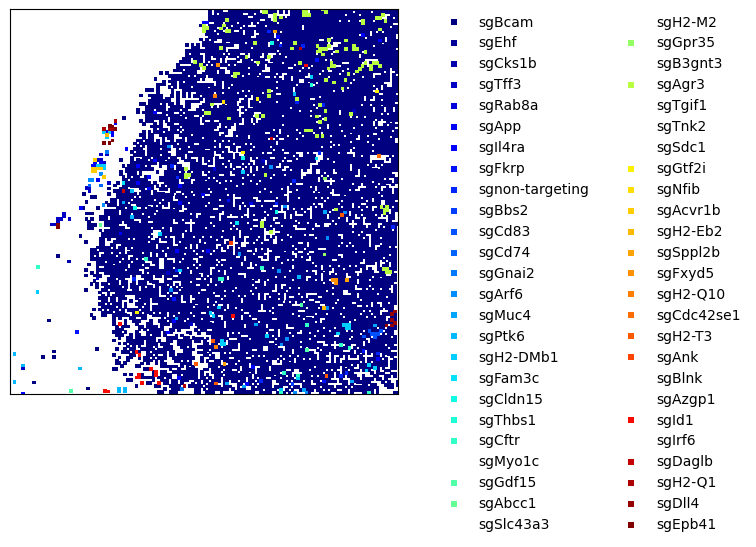

In [45]:
from tqdm import tqdm

region_x, region_y = [42500, 46500], [22500, 26500]

plot_data = gdata[(gdata.obsm['spatial'][:, 0] < region_x[1]) & (gdata.obsm['spatial'][:, 0] > region_x[0]) &\
                  (gdata.obsm['spatial'][:, 1] < region_y[1]) & (gdata.obsm['spatial'][:, 1] > region_y[0])]
cdf = pd.DataFrame(plot_data.X.toarray(), columns=plot_data.var_names)

cmap = plt.cm.get_cmap('bone')
plt.figure(figsize=(5, 5))
for i, col in enumerate(count_df['gene'].head(50).values):
    sns.scatterplot(x=plot_data.obsm['spatial'][:, 0],
                    y=plot_data.obsm['spatial'][:, 1],
                    s=cdf[col].clip(0, 1) * 7,
                    label=col,
                    marker='s',
                    color=colors[count_df.loc[count_df['gene'] == col, 'rank'] - 1])
plt.xlim(region_x[0], region_x[1])
plt.ylim(region_y[0], region_y[1])
plt.legend(loc='upper right', bbox_to_anchor=(1.9, 1), borderaxespad=0., frameon=False, ncol=2, markerscale=2, fontsize=10)
plt.xticks([])
plt.yticks([])

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('./plots/perturbation_low.pdf', bbox_inches='tight', format='pdf')
plt.show()

/tmp/ipykernel_3753/1907468019.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('bone')


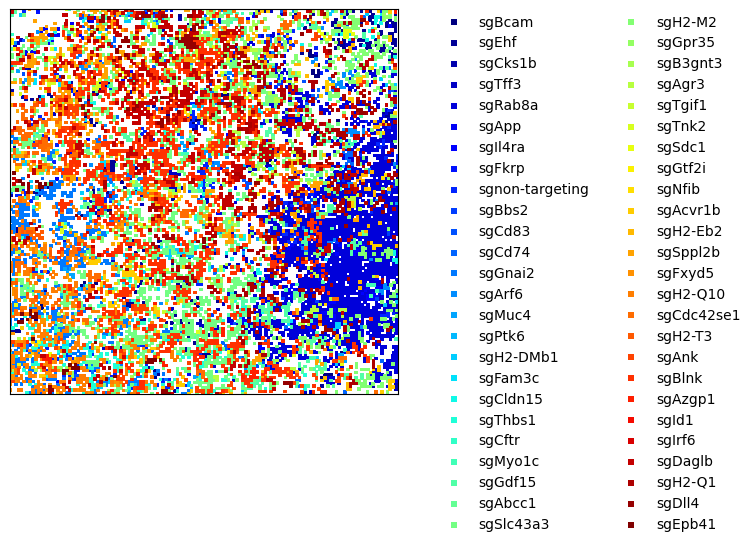

In [46]:
from tqdm import tqdm

region_x, region_y = [56000, 60000], [6000, 10000]

plot_data = gdata[(gdata.obsm['spatial'][:, 0] < region_x[1]) & (gdata.obsm['spatial'][:, 0] > region_x[0]) &\
                  (gdata.obsm['spatial'][:, 1] < region_y[1]) & (gdata.obsm['spatial'][:, 1] > region_y[0])]
cdf = pd.DataFrame(plot_data.X.toarray(), columns=plot_data.var_names)

cmap = plt.cm.get_cmap('bone')
plt.figure(figsize=(5, 5))
for i, col in enumerate(count_df['gene'].head(50).values):
    sns.scatterplot(x=plot_data.obsm['spatial'][:, 0],
                    y=plot_data.obsm['spatial'][:, 1],
                    s=cdf[col].clip(0, 1) * 7,
                    label=col,
                    marker='s',
                    color=colors[count_df.loc[count_df['gene'] == col, 'rank'] - 1])
plt.xlim(region_x[0], region_x[1])
plt.ylim(region_y[0], region_y[1])
plt.legend(loc='upper right', bbox_to_anchor=(1.9, 1), borderaxespad=0., frameon=False, ncol=2, markerscale=2, fontsize=10)
plt.xticks([])
plt.yticks([])

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('./plots/perturbation_high.pdf', bbox_inches='tight', format='pdf')
plt.show()

18666it [00:04, 3768.52it/s]
/tmp/ipykernel_3753/781430468.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('bone')


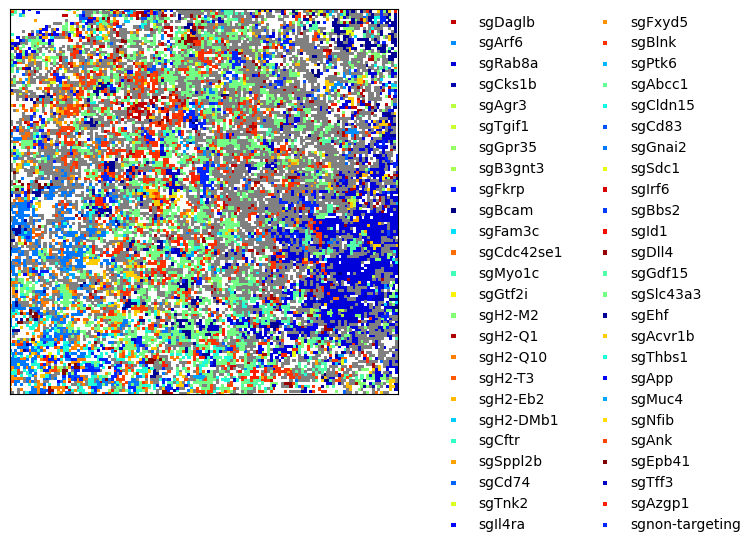

In [28]:
from tqdm import tqdm

cdf = pd.DataFrame(plot_data.X.toarray(), columns=plot_data.var_names)
cdf['max'] = cdf.idxmax(axis=1)
for i, row in tqdm(cdf.iterrows()):
    row.loc[row.index != row['max']] = 0
cdf

cmap = plt.cm.get_cmap('bone')
plt.figure(figsize=(5, 5))
for i, col in enumerate(cdf.columns):
    if col == 'max': continue
    if cdf[col].sum() < 1: continue
    if col in count_df['gene'].head(50).values:
        plt.scatter(plot_data.obsm['spatial'][:, 0], plot_data.obsm['spatial'][:, 1],
                c=colors[count_df.loc[count_df['gene'] == col, 'rank'] - 1], s=cdf[col].clip(0, 1) * 5, edgecolor='none', marker='s', label=col)
    elif cdf[col].sum() > 300:
        plt.scatter(plot_data.obsm['spatial'][:, 0], plot_data.obsm['spatial'][:, 1],
                c='gray', s=cdf[col].clip(0, 1) * 5, edgecolor='none', marker='s')
plt.xlim(region_x[0], region_x[1])
plt.ylim(region_y[0], region_y[1])
plt.legend(loc='upper right', bbox_to_anchor=(1.9, 1), borderaxespad=0., frameon=False, ncol=2, markerscale=2, fontsize=10)
plt.xticks([])
plt.yticks([])

# plt.rcParams['pdf.fonttype'] = 42
# plt.savefig('./plots/perturbation_assignment.pdf', bbox_inches='tight', format='pdf')
plt.show()

18666it [00:03, 4966.70it/s]
/tmp/ipykernel_49104/3103518728.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Blues')
/tmp/ipykernel_49104/3103518728.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(plot_data.obsm['spatial'][:, 0], plot_data.obsm['spatial'][:, 1],
/tmp/ipykernel_49104/3103518728.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please 

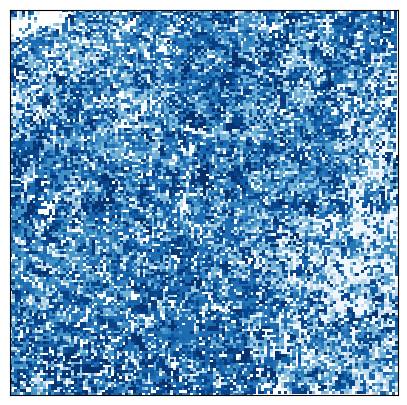

In [12]:
from tqdm import tqdm

cdf = pd.DataFrame(plot_data.X.toarray(), columns=plot_data.var_names)
cdf['max'] = cdf.idxmax(axis=1)
for i, row in tqdm(cdf.iterrows()):
    row.loc[row.index != row['max']] = 0
cdf

cmap = plt.cm.get_cmap('Blues')
plt.figure(figsize=(5, 5))
for i, col in enumerate(cdf.columns):
    if col == 'max': continue
    if cdf[col].sum() < 1: continue
    if cdf[col].sum() > 300:
        plt.scatter(plot_data.obsm['spatial'][:, 0], plot_data.obsm['spatial'][:, 1],
                c=cmap(i / len(cdf.columns)), s=cdf[col].clip(0, 1) * 5, edgecolor='none', marker='s')
    else:
        plt.scatter(plot_data.obsm['spatial'][:, 0], plot_data.obsm['spatial'][:, 1],
                c=cmap(i / len(cdf.columns)), s=cdf[col].clip(0, 1) * 5, edgecolor='none', marker='s')
plt.xlim(region_x[0], region_x[1])
plt.ylim(region_y[0], region_y[1])
# plt.legend(loc='upper right', bbox_to_anchor=(1.9, 1), borderaxespad=0., frameon=False, ncol=2, markerscale=2, fontsize=10)
plt.xticks([])
plt.yticks([])

# plt.rcParams['pdf.fonttype'] = 42
plt.savefig('./plots/perturbation_assignment.png', dpi=300, format='png')
plt.show()

In [17]:
region_x, region_y = [42500, 46500], [22500, 26500]

plot_data = gdata[(gdata.obsm['spatial'][:, 0] < region_x[1]) & (gdata.obsm['spatial'][:, 0] > region_x[0]) &\
                  (gdata.obsm['spatial'][:, 1] < region_y[1]) & (gdata.obsm['spatial'][:, 1] > region_y[0])]

15210it [00:03, 4381.86it/s]
/tmp/ipykernel_49104/3203221992.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('twilight')
/tmp/ipykernel_49104/3203221992.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(plot_data.obsm['spatial'][:, 0], plot_data.obsm['spatial'][:, 1],
/tmp/ipykernel_49104/3203221992.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Plea

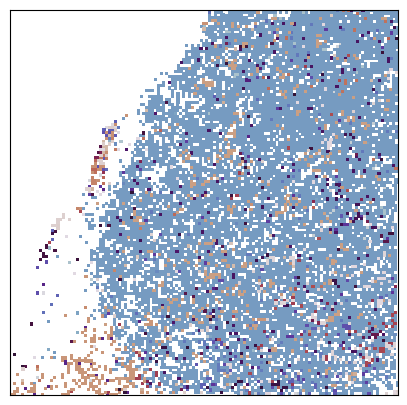

In [26]:
from tqdm import tqdm

cdf = pd.DataFrame(plot_data.X.toarray(), columns=plot_data.var_names)
cdf['max'] = cdf.idxmax(axis=1)
for i, row in tqdm(cdf.iterrows()):
    row.loc[row.index != row['max']] = 0
cdf

cmap = plt.cm.get_cmap('twilight')
plt.figure(figsize=(5, 5))
for i, col in enumerate(cdf.columns):
    if col == 'max': continue
    if cdf[col].sum() < 1: continue
    if cdf[col].sum() > 300:
        plt.scatter(plot_data.obsm['spatial'][:, 0], plot_data.obsm['spatial'][:, 1],
                c=cmap(i / len(cdf.columns)), s=cdf[col].clip(0, 1) * 5, edgecolor='none', marker='s')
    else:
        plt.scatter(plot_data.obsm['spatial'][:, 0], plot_data.obsm['spatial'][:, 1],
                c=cmap(i / len(cdf.columns)), s=cdf[col].clip(0, 1) * 5, edgecolor='none', marker='s')
plt.xlim(region_x[0], region_x[1])
plt.ylim(region_y[0], region_y[1])
# plt.legend(loc='upper right', bbox_to_anchor=(1.8, 1), borderaxespad=0., frameon=False, ncol=2, markerscale=2, fontsize=10)
plt.xticks([])
plt.yticks([])

# plt.rcParams['pdf.fonttype'] = 42
plt.savefig('./plots/perturbation_assignment_2.png', dpi=300, format='png')
plt.show()

15210it [00:03, 4715.06it/s]
/tmp/ipykernel_49104/3442725791.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('twilight')
/tmp/ipykernel_49104/3442725791.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(plot_data.obsm['spatial'][:, 0], plot_data.obsm['spatial'][:, 1],
/tmp/ipykernel_49104/3442725791.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Plea

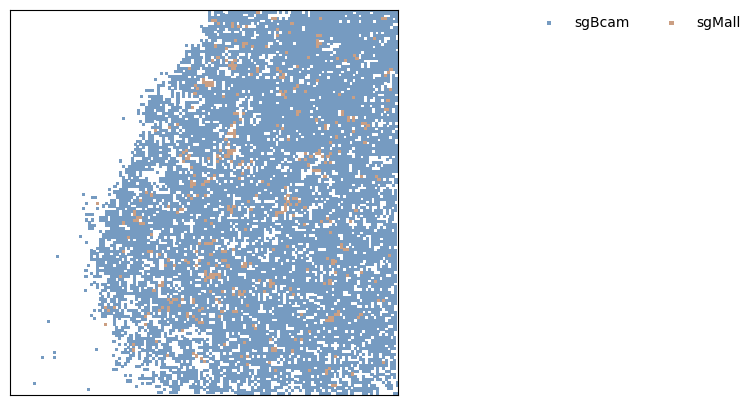

In [29]:
from tqdm import tqdm

cdf = pd.DataFrame(plot_data.X.toarray(), columns=plot_data.var_names)
cdf['max'] = cdf.idxmax(axis=1)
for i, row in tqdm(cdf.iterrows()):
    row.loc[row.index != row['max']] = 0
cdf

cmap = plt.cm.get_cmap('twilight')
plt.figure(figsize=(5, 5))
for i, col in enumerate(cdf.columns):
    if col == 'max': continue
    if cdf[col].sum() < 1: continue
    if cdf[col].sum() > 300:
        plt.scatter(plot_data.obsm['spatial'][:, 0], plot_data.obsm['spatial'][:, 1],
                c=cmap(i / len(cdf.columns)), s=cdf[col].clip(0, 1) * 5, edgecolor='none', marker='s', label=col)
plt.xlim(region_x[0], region_x[1])
plt.ylim(region_y[0], region_y[1])
plt.legend(loc='upper right', bbox_to_anchor=(1.9, 1), borderaxespad=0., frameon=False, ncol=2, markerscale=2, fontsize=10)
plt.xticks([])
plt.yticks([])

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('./plots/perturbation_assignment_2.pdf', bbox_inches='tight', format='pdf')
plt.show()